<a href="https://colab.research.google.com/github/BelongsToMe091603/Experience-MN/blob/main/Qolami_New_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Set parameters
IMG_SIZE = 64  # Ukuran gambar
NUM_CLASSES = 30  # Jumlah kelas (huruf hijaiyah)

In [3]:
# Load dataset
def load_data(dataset_path):
    images = []
    labels = []
    class_names = os.listdir(dataset_path)  # Pastikan dataset terorganisasi dalam folder per huruf
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            img = tf.keras.preprocessing.image.load_img(file_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels), class_names

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load your data (Gantilah dengan path dataset yang benar)
dataset_path = '/content/drive/MyDrive/Dataset Qwrite/Dataset New/alphabet'
images, labels, class_names = load_data(dataset_path)

In [6]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [7]:
from keras.layers import Input
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 1)),  # Define the input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # Output layer for multi-class classification
])

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.1319 - loss: 3.0895 - val_accuracy: 0.5246 - val_loss: 1.6978
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4677 - loss: 1.7593 - val_accuracy: 0.6523 - val_loss: 1.0550
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6025 - loss: 1.2046 - val_accuracy: 0.7417 - val_loss: 0.7621
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6875 - loss: 0.8724 - val_accuracy: 0.7698 - val_loss: 0.6368
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7332 - loss: 0.7281 - val_accuracy: 0.7875 - val_loss: 0.5734
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7799 - loss: 0.6242 - val_accuracy: 0.8179 - val_loss: 0.4995
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8181 - loss: 0.5106 - val_accuracy: 0.8276 - val_loss: 0.4716
Epoch 8/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8423 - loss: 0.4318 - val_accuracy: 0

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8705 - loss: 0.3977
Accuracy: 87.74%


In [11]:
# Print classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print('classification_report = '+classification_report(y_test, y_pred_classes, target_names=class_names))

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
classification_report =               precision    recall  f1-score   support

           م       0.99      0.96      0.97        69
           ل       0.98      0.97      0.97        60
           ي       0.98      0.89      0.93        56
           ك       0.99      1.00      0.99        70
           ف       0.92      0.91      0.91        74
           و       0.95      0.90      0.92        67
           ق       0.86      0.93      0.89        54
           ن       0.89      0.96      0.92        56
           ه       0.82      0.98      0.89        47
           غ       0.94      0.70      0.80        64
           ض       0.87      0.81      0.84        84
           ع       0.64      0.93      0.76        46
           ظ       0.73      0.75      0.74        63
           ص       0.84      0.83      0.83        88
           ز       1.00      0.83      0.91        53
           ش       0.94      0.89      0.91        72
           ر     

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


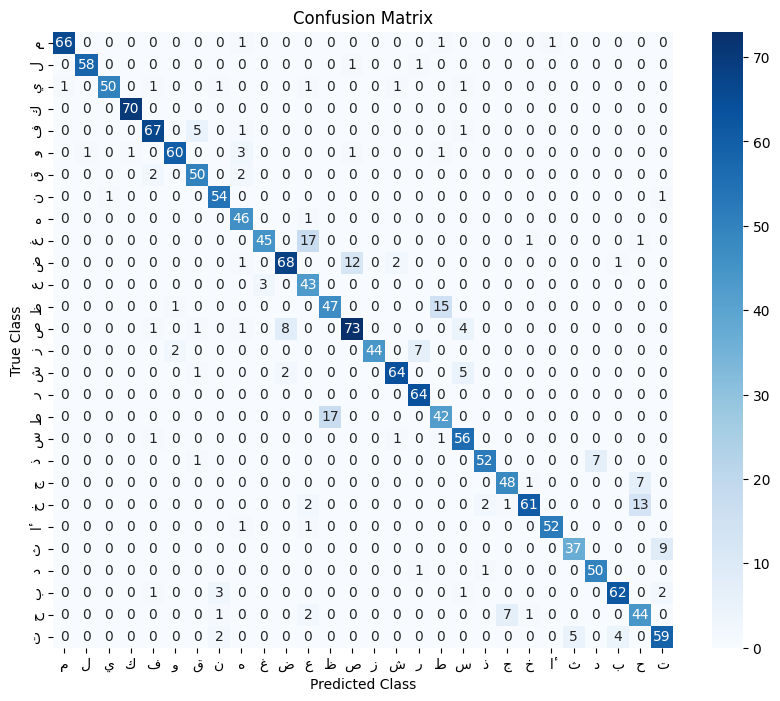

In [12]:
# Prediksi dan hasil kelas yang sebenarnya
y_pred_classes = np.argmax(model.predict(X_test), axis=1)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

Dibuat tabel dengan rapih pake pandas


In [21]:
# # Get confident level for each prediction
# confident_levels = np.max(y_pred, axis=1)
# print(list(confident_levels))

# # Display confident levels alongside predictions
# for i in range(len(y_test)):
#     print(f"True Label: {class_names[y_test[i]]}, Predicted Label: {class_names[y_pred_classes[i]]}, Confident Level: {confident_levels[i]:.2f}")

In [22]:
# Convert the model to TensorFlow Lite (TFLite) format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpzmcppk80'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 30), dtype=tf.float32, name=None)
Captures:
  136378362369744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136378362371280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136378362372624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136378362370704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136378362372048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136378362374352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136378362374160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136378362372240: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [23]:
# Save the TFLite model to a file
tflite_model_path = '/content/drive/MyDrive/Dataset Qwrite/Dataset New/model_hijaiyah_augmentasi_600_400.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved to {tflite_model_path}")

TFLite model saved to /content/drive/MyDrive/Dataset Qwrite/Dataset New/model_hijaiyah_augmentasi_600_400.tflite
